In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Customer Churn.csv')

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


converting dat types

In [14]:
df.TotalCharges=df.TotalCharges.replace(' ','0')

In [16]:
df.TotalCharges=df.TotalCharges.astype('float')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:
def conv(a):
    if a==1:
        return'yes'
    else:
        return'no'
df.SeniorCitizen=df.SeniorCitizen.apply(conv)

In [28]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,no,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,no,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,no,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


preparing countplot for churn

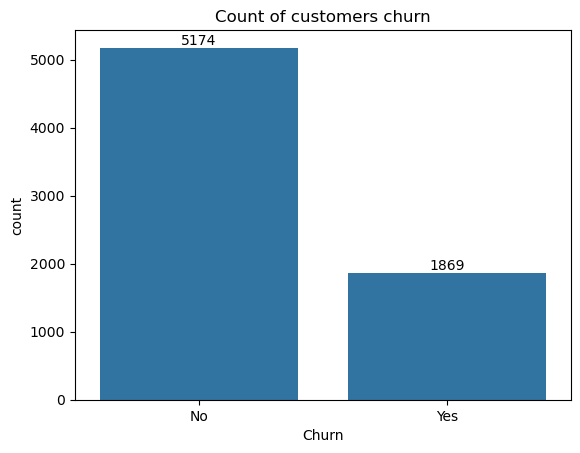

In [64]:
ax=sns.countplot(x=df.Churn)
ax.bar_label(ax.containers[0])
plt.title('Count of customers churn')
plt.show;


creating pie chart

In [43]:
gb=df.groupby('Churn').agg({'Churn':'count'})

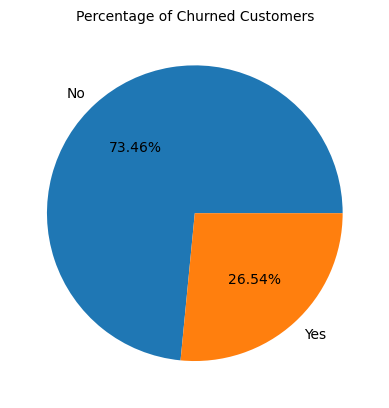

In [72]:
plt.pie(gb['Churn'],labels=gb.index,autopct='%1.2f%%');
plt.title("Percentage of Churned Customers",fontsize=10);


 from this chart wecan understant 26 percent is churned out

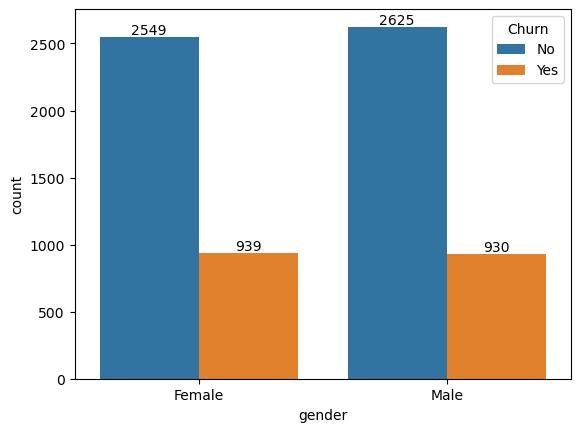

In [172]:
ax=sns.countplot(x=df.gender,hue=df.Churn)
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);

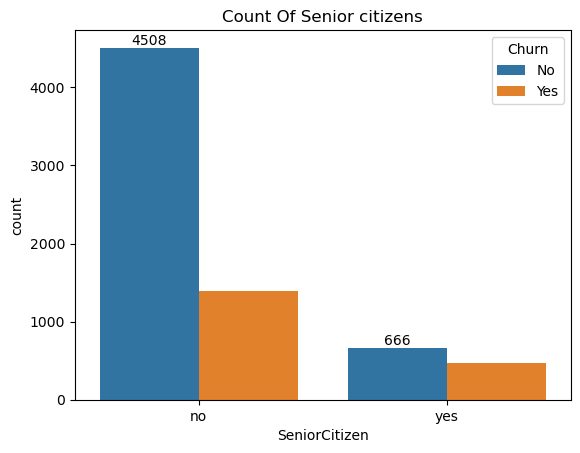

In [99]:
ax=sns.countplot(x=df.SeniorCitizen,hue=df.Churn)
ax.bar_label(ax.containers[0]);
plt.title('Count Of Senior citizens');

 churn among senior citizens are more than others

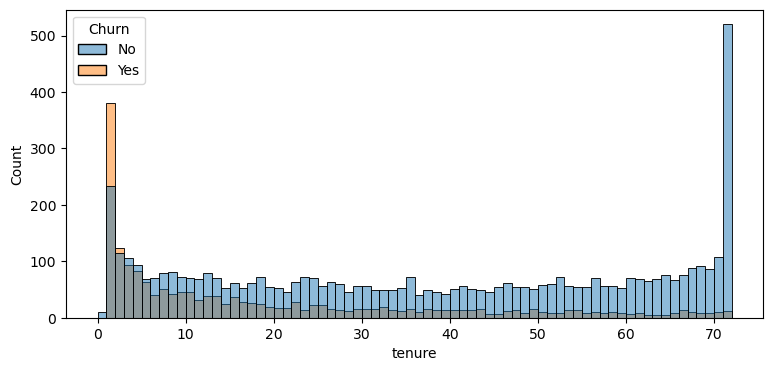

In [111]:
plt.figure(figsize=(9,4))
sns.histplot(x=df.tenure,bins=72,hue=df.Churn);

people who have used service for long period have stayed and people who have used for short period have churned

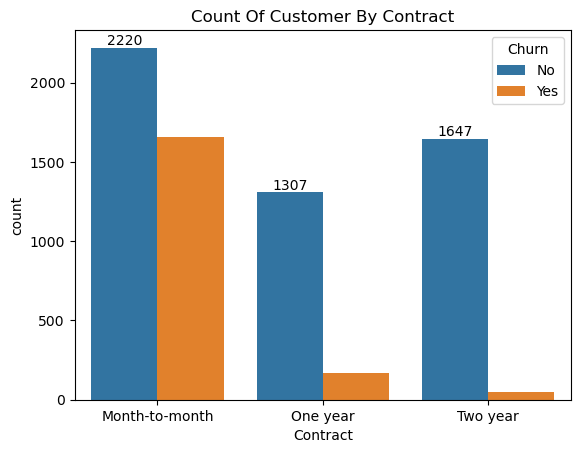

In [118]:
ax=sns.countplot(x=df.Contract,hue=df.Churn)
ax.bar_label(ax.containers[0]);
plt.title('Count Of Customer By Contract');

people who are moth to month contract are likely to churn

In [126]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

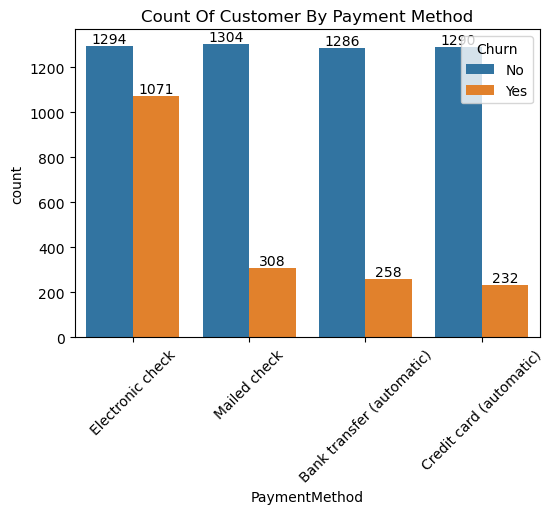

In [169]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x=df.PaymentMethod,hue=df.Churn)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Count Of Customer By Payment Method');
plt.xticks(rotation=45);

customer is likely to churn when he is using electronic check as payment methord

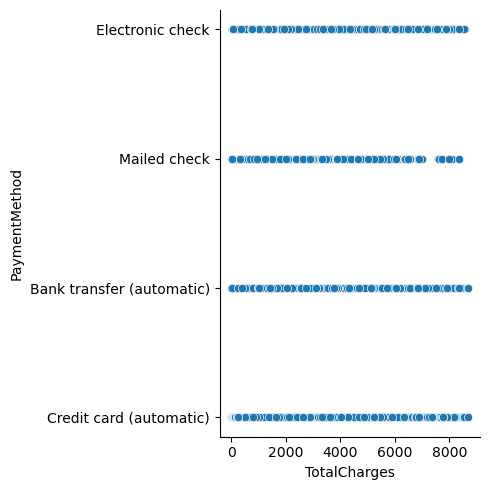

In [192]:
sns.relplot(x=df.TotalCharges,y=df.PaymentMethod)

C:\Users\Hp\AppData\Local\Temp\ipykernel_5164\2832887286.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df.TotalCharges,rug=True)


Text(0.5, 0, 'Total Charges')

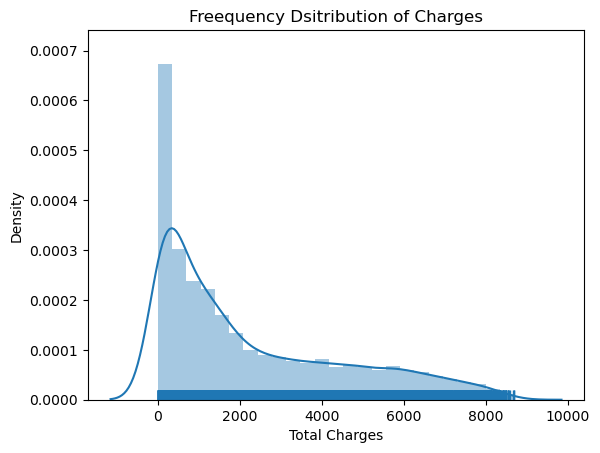

In [202]:
sns.distplot(x=df.TotalCharges,rug=True)
plt.title('Freequency Dsitribution of Charges')
plt.xlabel('Total Charges')

Majority of people are paying charges upto 2000

<Axes: ylabel='TotalCharges'>

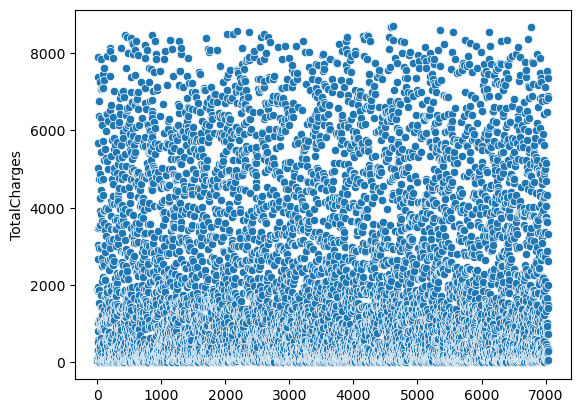

In [226]:
sns.scatterplot(df.TotalCharges)

this also representing majority of customers  are paying below 200

<Axes: xlabel='tenure', ylabel='Contract'>

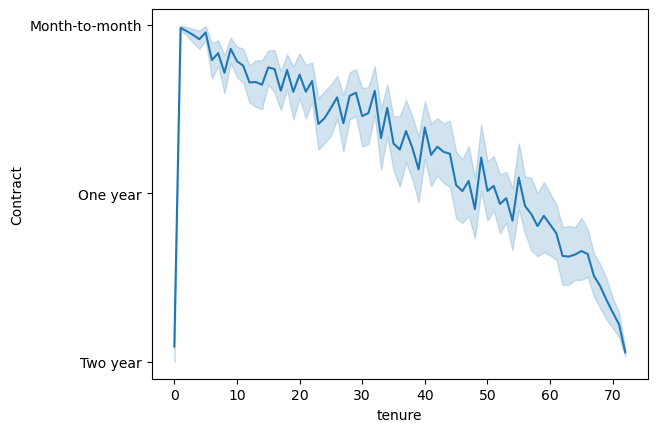

In [232]:
sns.lineplot(x=df.tenure,y=df.Contract)

Customers staying below 20 months are chosing month to moth plan
cutomers in between 20 to 50 are taking more one year contact

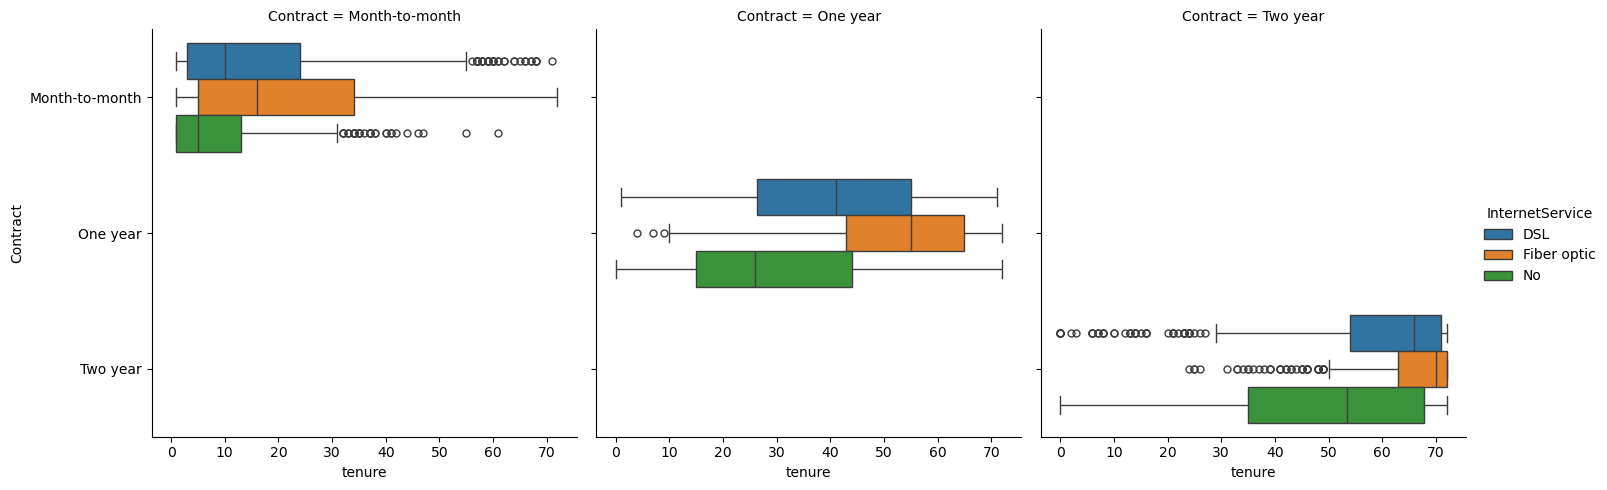

In [255]:
sns.catplot(x=df.tenure,y=df.Contract,kind='box',hue=df.InternetService,col=df.Contract)

from this chart in each plan cutomers chose Fiber optic internet service

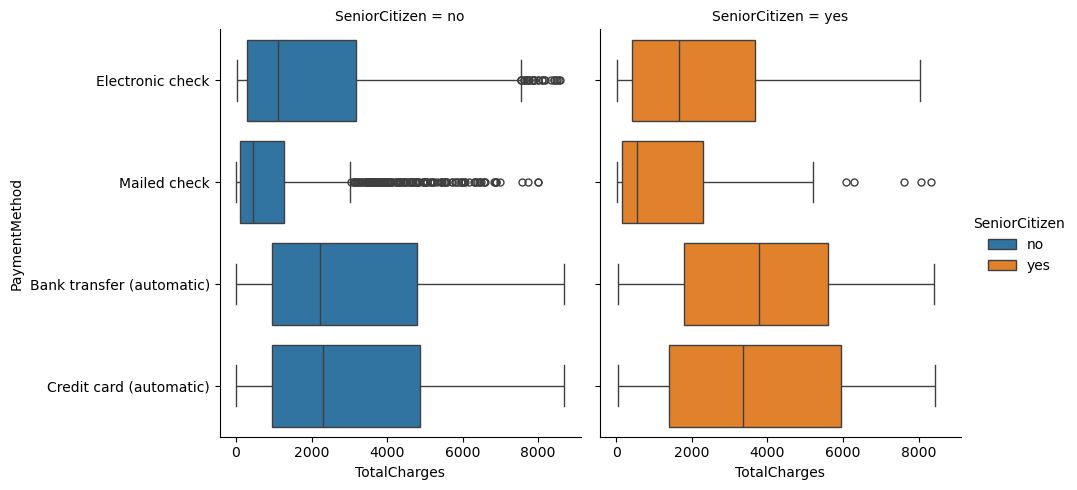

In [275]:
sns.catplot(x=df.TotalCharges,y=df.PaymentMethod,kind='box',hue=df.SeniorCitizen,col=df.SeniorCitizen)

while comparing with others senior citizens are paying more and the average payment done by them is more in bank transfer

<Axes: xlabel='SeniorCitizen', ylabel='count'>

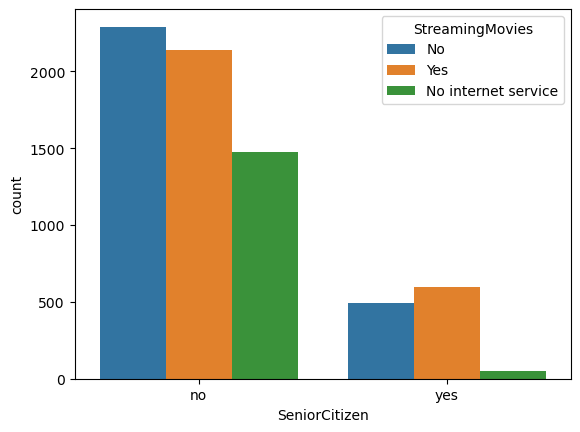

In [294]:
sns.countplot(x=df.SeniorCitizen,hue=df.StreamingMovies)

while comparing senior citizens doesnt want streming movies 

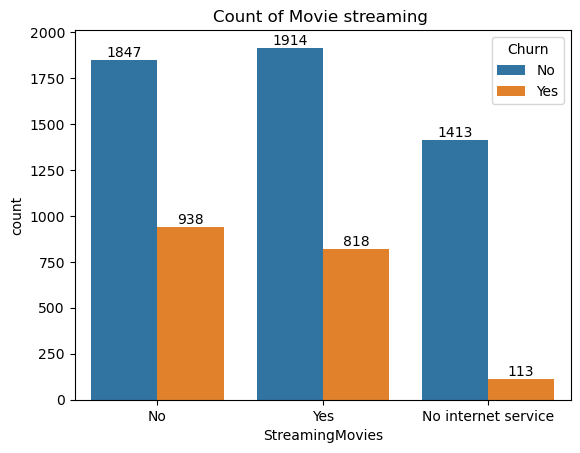

In [301]:
ax=sns.countplot(x=df.StreamingMovies,hue=df.Churn)
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1])
plt.title('Count of Movie streaming ');

customers who are not taken steaming service tend to be losse

In [315]:
X=df.pivot_table(index='Contract',columns='PaymentMethod',values='TotalCharges',aggfunc={'TotalCharges':'mean'})

Text(0.5, 1.0, 'Avg Payment by Each Plans With Payment Mode')

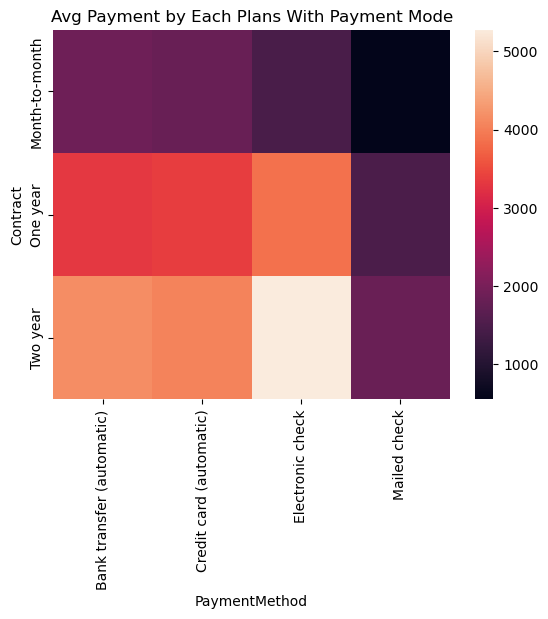

In [323]:
sns.heatmap(X)
plt.title('Avg Payment by Each Plans With Payment Mode')

 From this Heatmap we can understand two year plan payed through electronic check have highest average amount

and also month to month with mailed check have recieved least amount

In [333]:
y=df.pivot_table(index='Contract',columns='PaymentMethod',values='TotalCharges',aggfunc={'TotalCharges':'sum'})

Text(0.5, 1.0, 'Total  Payment by Each Plans With Payment Mode')

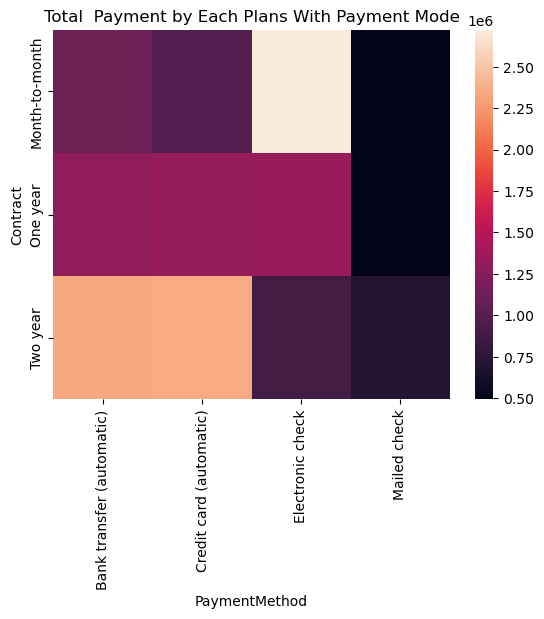

In [339]:
sns.heatmap(X)
plt.title('Total  Payment by Each Plans With Payment Mode')

month to month with electonic check have recieved more amount

In [369]:
count=df.groupby('PaymentMethod').agg({'TotalCharges':'count'}).reset_index()

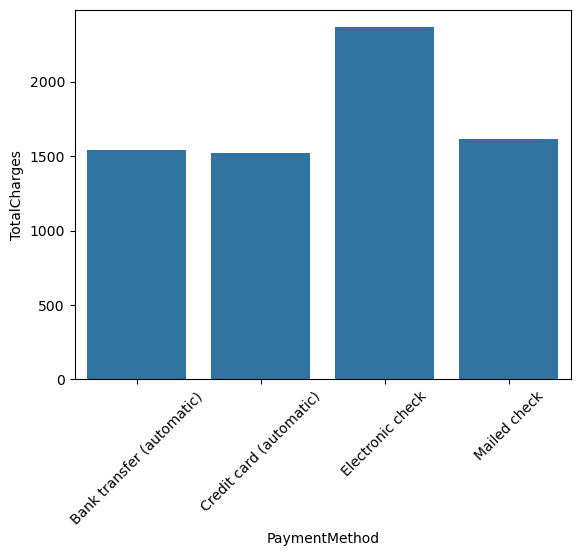

In [375]:
sns.barplot(x=count.PaymentMethod,y=count.TotalCharges)
plt.xticks(rotation=45);

most of the transactions are done through electronic check

[Text(0, 0, '170'), Text(0, 0, '849'), Text(0, 0, '850')]

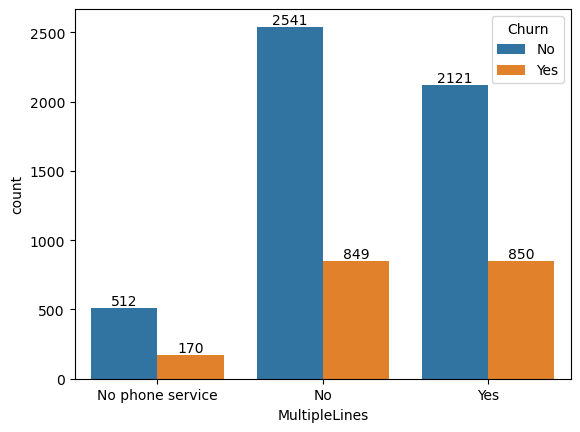

In [383]:
ax=sns.countplot(x=df.MultipleLines,hue=df.Churn)
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1])

customers who have mulpiple connection have high churn rate

[Text(0, 0, '1461'), Text(0, 0, '295'), Text(0, 0, '113')]

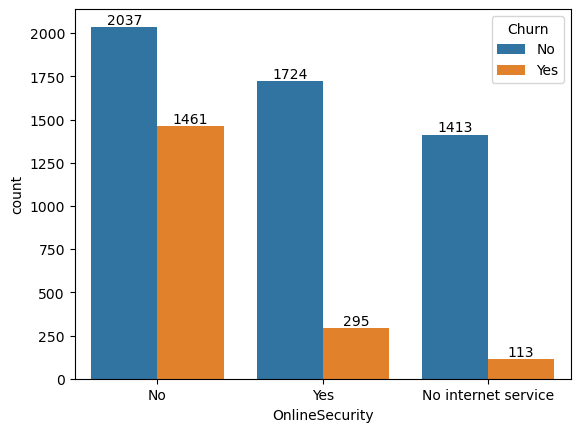

In [385]:
ax=sns.countplot(x=df.OnlineSecurity,hue=df.Churn)
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1])

people who don't have online security tend to be losse

[Text(0, 0, '523'), Text(0, 0, '1233'), Text(0, 0, '113')]

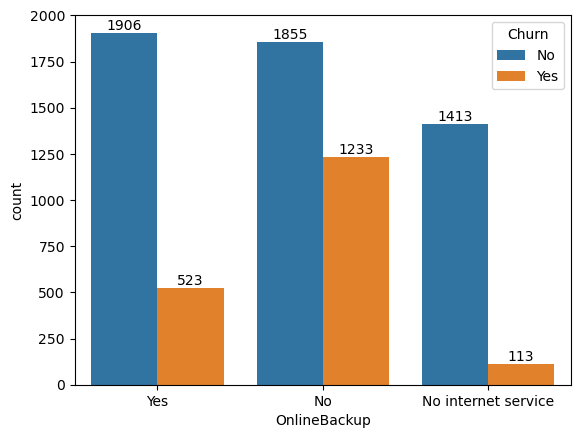

In [387]:
ax=sns.countplot(x=df.OnlineBackup,hue=df.Churn)
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1])

who don't have online backup have high churn rate

[Text(0, 0, '1211'), Text(0, 0, '545'), Text(0, 0, '113')]

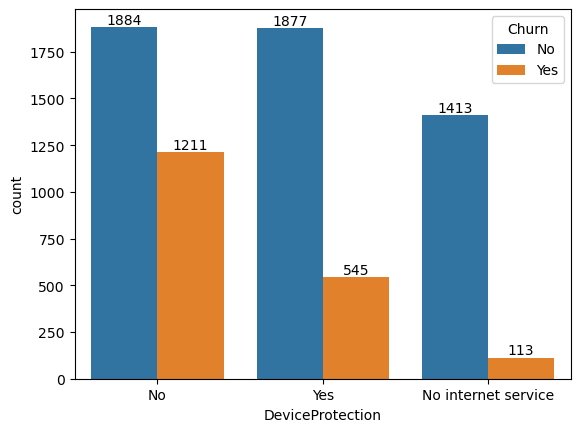

In [389]:
ax=sns.countplot(x=df.DeviceProtection,hue=df.Churn)
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1])

who have divice protection will retain

[Text(0, 0, '1446'), Text(0, 0, '310'), Text(0, 0, '113')]

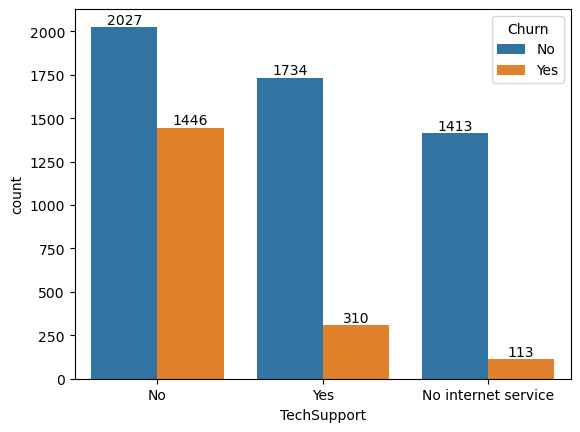

In [391]:
ax=sns.countplot(x=df.TechSupport,hue=df.Churn)
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1])

[Text(0, 0, '942'), Text(0, 0, '814'), Text(0, 0, '113')]

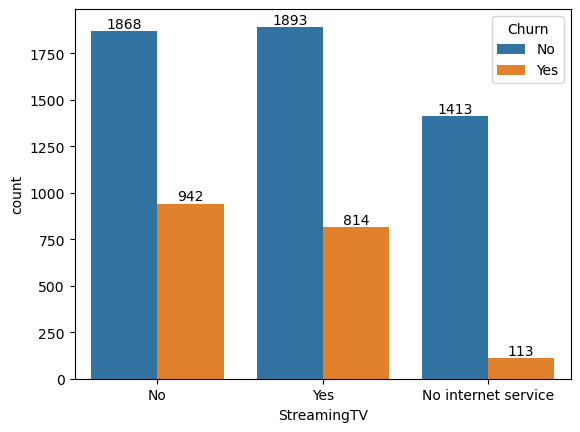

In [393]:
ax=sns.countplot(x=df.StreamingTV,hue=df.Churn)
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1])

In [381]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')